### Part1

**Use flannBasedMatcher**

In [3]:
########### Libraries ###########
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# This function is used to check the corresponding points,
# and shake of the camera based on them
# The flag_part5 will be true for the fifth part to plot the corresponding points
def check_shake(image1, image2, matcher, flag_part5=False):
    
    # Create the SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, descr1 = sift.detectAndCompute(image1,None)
    kp2, descr2 = sift.detectAndCompute(image2,None)

    # Check whether ‫‪the algorithm is FlannBasedMatcher‬‬ or BFMatcher
    if matcher == 'flann':
        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        # Specify the algorithm and the number of trees
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        # Specify the number of iterations(use default value)
        search_params = dict()
    
        # Feed both parameters to FlannBasedMatcher
        object = cv2.FlannBasedMatcher(index_params,search_params)
    elif matcher == 'bfm':
        # create BFMatcher object
        object = cv2.BFMatcher()  

    # Define knnMatch with k=2
    matches = object.knnMatch(descr1, descr2, k=2)

    # Loop on all matches and check the smaller value as
    # the benchmark to check the shake of the camera
    check_move = 0
    good_matches = []
    flag_shake = False
    for (m,n) in matches:
        if min(m.distance,n.distance) <= 5:
            # print("some informations")
            # print(m.trainIdx)
            # print(m.queryIdx)
            # print(len(m))
            check_move +=1
            good_matches.append([m])
            
    # Check whether shaking was occurred(threshold = 100)
    if check_move >= 1:
        flag_shake = True

    # This part will be used for the fifth part
    if flag_part5:
        # Connect selected points
        corresponding_image = cv2.drawMatchesKnn(image1, kp1, 
                                                image2, kp2, good_matches,None,
                                 flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.figure(figsize=(20,10))
        plt.imshow(corresponding_image)
        plt.show()
        

    return check_move, flag_shake
    
    
    # Create a mask variable to separate suitable points
    masks = [[0,0] for i in range(len(matches))]



    

In [8]:
# First image
img1 = cv2.imread('./1/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./1/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='flann')
print("image1")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image1
Number of close points(less than 5): 135
The flag of no camera shaking is: True


In [9]:
# Second image
img1 = cv2.imread('./2/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./2/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='flann')
print("image2")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image2
Number of close points(less than 5): 0
The flag of no camera shaking is: False


In [10]:
# Third image
img1 = cv2.imread('./3/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./3/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='flann')
print("image3")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image3
Number of close points(less than 5): 4
The flag of no camera shaking is: True


In [11]:
# Fourth image
img1 = cv2.imread('./4/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./4/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='flann')
print("image4")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image4
Number of close points(less than 5): 0
The flag of no camera shaking is: False


### Part2

**Use BFMatcher**

In [12]:
# First image
img1 = cv2.imread('./1/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./1/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='bfm')
print("image1")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image1
Number of close points(less than 5): 135
The flag of no camera shaking is: True


In [13]:
# Second image
img1 = cv2.imread('./2/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./2/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='bfm')
print("image2")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image2
Number of close points(less than 5): 0
The flag of no camera shaking is: False


In [14]:
# Third image
img1 = cv2.imread('./3/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./3/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='bfm')
print("image3")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image3
Number of close points(less than 5): 4
The flag of no camera shaking is: True


In [15]:
# Fourth image
img1 = cv2.imread('./4/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./4/000002.jpg', cv2.IMREAD_GRAYSCALE)
check_move, flag_shake = check_shake(img1, img2, matcher='bfm')
print("image4")
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 

image4
Number of close points(less than 5): 0
The flag of no camera shaking is: False


### Part3

**BFMatcher is slower than FlannBasedMatcher**

**Reason: FlannBasedMatcher uses the the KD_tree algorithm which has log order but BFMatcher uses exhaustive search to find nearest neighbors. So FlannBasedMatcher is faster but less precise**

**The order of computation of the FlannBasedMatcher with KD_tree is log(n) while this order of the BFMatcher is n**

### Part4

**No. SITF algorithm is not sensitive to scale**

### Part5

**I use flannBasedMatcher for this part(There is no difference in the selected algorithm)**

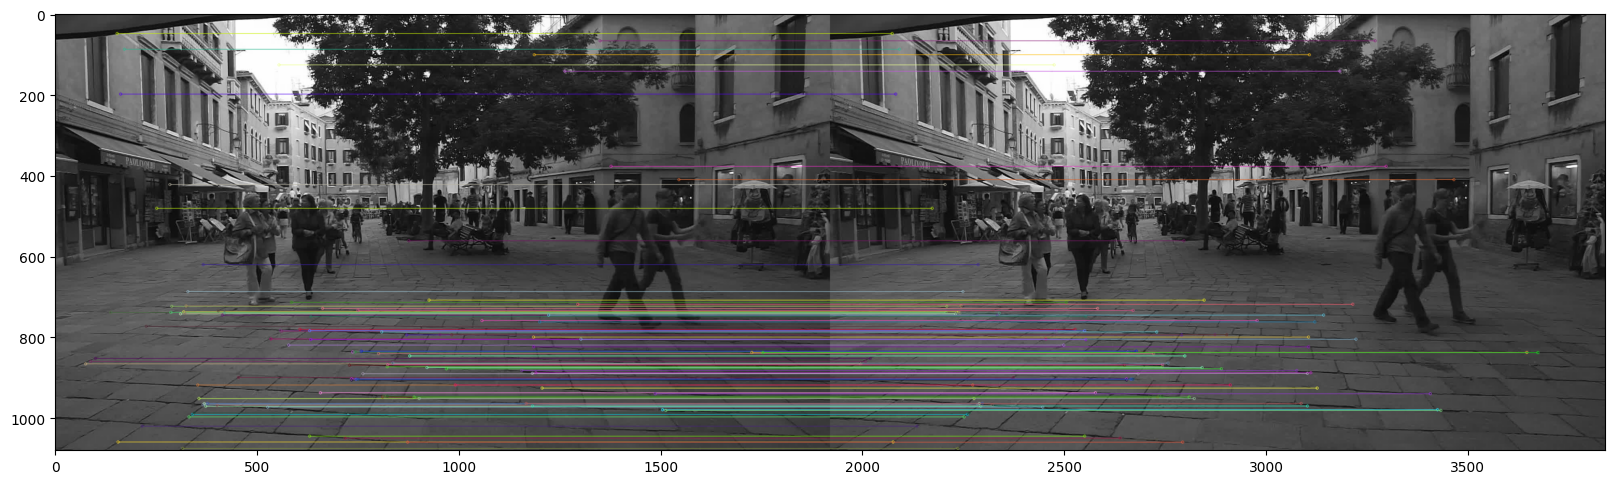

In [240]:
# First image
img1 = cv2.imread('./1/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./1/000002.jpg', cv2.IMREAD_GRAYSCALE)
_, _ = check_shake(img1, img2, matcher='flann', flag_part5=True)


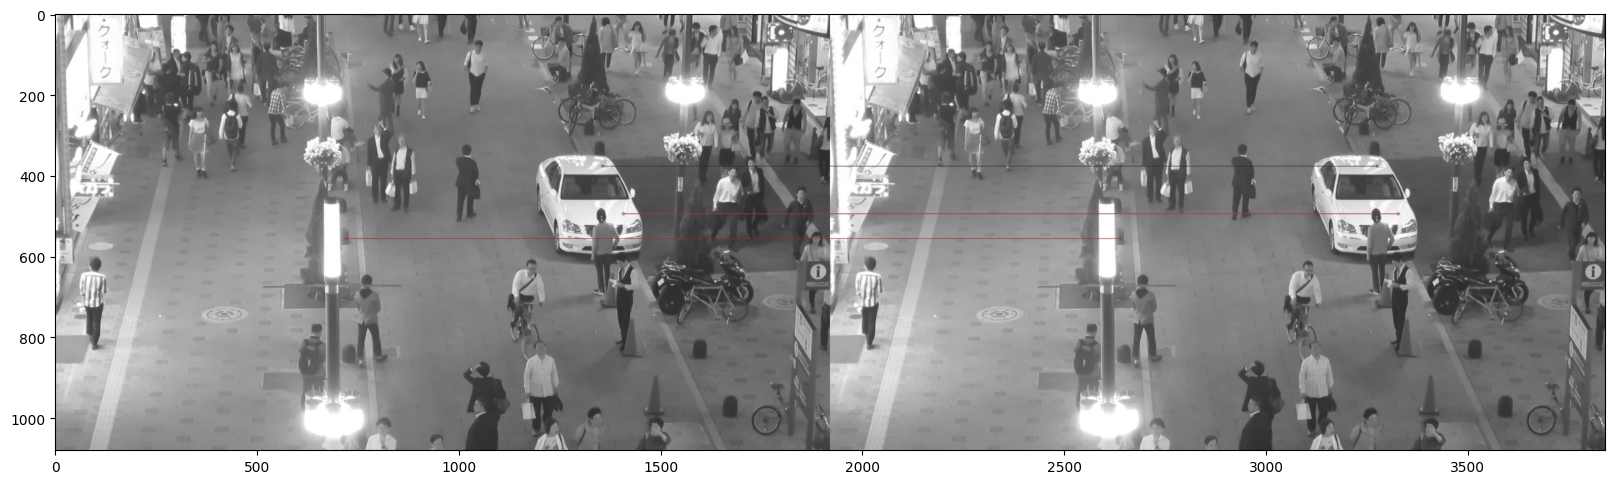

In [241]:
# Third image
img1 = cv2.imread('./3/000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./3/000002.jpg', cv2.IMREAD_GRAYSCALE)
_, _ = check_shake(img1, img2, matcher='flann', flag_part5=True)

**The common features of these points is that they are edges or blobs in both frames.**

**It is expected to use points that are edges or corners for video stabilization. video stabilization methods will typically track a set of SIFT points across the frames. The motion of the camera can then be estimated by comparing the positions of the SIFT points in the two frames. the descriptor of these points should be close to each corresponding point to consider as a precise correspondence. Corners, edges, and blobs are the points that are completely beneficial in stabilizing video frames even with a shake or other troubles like occlusion.(specifically in the first image, it's clear that the most precise points in hence of the closeness of descriptions are edges(lines between tiles on the ground)**